In [69]:
import pandas as pd
import numpy as np
import json

### Load and process review dataset

##### Load the dataset into a data frame named products

In [70]:
products = pd.read_csv('amazon_baby_subset.csv')

In [71]:
products.head()

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1


In [72]:
products['sentiment'].value_counts()

 1    26579
-1    26493
Name: sentiment, dtype: int64

##### Load the important words

In [73]:
with open('important_words.json') as words:
    important_words = json.load(words)

In [74]:
important_words

['baby',
 'one',
 'great',
 'love',
 'use',
 'would',
 'like',
 'easy',
 'little',
 'seat',
 'old',
 'well',
 'get',
 'also',
 'really',
 'son',
 'time',
 'bought',
 'product',
 'good',
 'daughter',
 'much',
 'loves',
 'stroller',
 'put',
 'months',
 'car',
 'still',
 'back',
 'used',
 'recommend',
 'first',
 'even',
 'perfect',
 'nice',
 'bag',
 'two',
 'using',
 'got',
 'fit',
 'around',
 'diaper',
 'enough',
 'month',
 'price',
 'go',
 'could',
 'soft',
 'since',
 'buy',
 'room',
 'works',
 'made',
 'child',
 'keep',
 'size',
 'small',
 'need',
 'year',
 'big',
 'make',
 'take',
 'easily',
 'think',
 'crib',
 'clean',
 'way',
 'quality',
 'thing',
 'better',
 'without',
 'set',
 'new',
 'every',
 'cute',
 'best',
 'bottles',
 'work',
 'purchased',
 'right',
 'lot',
 'side',
 'happy',
 'comfortable',
 'toy',
 'able',
 'kids',
 'bit',
 'night',
 'long',
 'fits',
 'see',
 'us',
 'another',
 'play',
 'day',
 'money',
 'monitor',
 'tried',
 'thought',
 'never',
 'item',
 'hard',
 'plasti

In [75]:
products.isna().sum()

name          90
review       241
rating         0
sentiment      0
dtype: int64

In [76]:
products = products.fillna({'review':''})

In [77]:
products['review'].isna().sum()

0

In [78]:
products

,name,review,rating,sentiment
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1
...,...,...,...,...
53067,"Samsung Baby Care Washer, Stainless Platinum, ...","My infant goes to a really crappy daycare, and...",1,-1
53068,"Mud Pie Milestone Stickers, Boy",Pretty please open and inspect these stickers ...,1,-1
53069,Best BIB for Baby - Soft Bib (Pink-Elephant),Great 5-Star Product but An Obvious knock-off ...,1,-1
53070,Bouncy&reg; Inflatable Real Feel Hopping Cow,When I received the item my initial thought wa...,2,-1


##### Remove punctuation

In [79]:
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [80]:
products['review_clean'] = products['review'].apply(remove_punctuation)

In [81]:
products['review']

0        All of my kids have cried non-stop when I trie...
1        We wanted to get something to keep track of ou...
2        My daughter had her 1st baby over a year ago. ...
3        One of baby's first and favorite books, and it...
4        Very cute interactive book! My son loves this ...
                               ...                        
53067    My infant goes to a really crappy daycare, and...
53068    Pretty please open and inspect these stickers ...
53069    Great 5-Star Product but An Obvious knock-off ...
53070    When I received the item my initial thought wa...
53071    I got this case in the mail today, it came on ...
Name: review, Length: 53072, dtype: object

##### Compute word counts (only for the important_words)

In [82]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda x: x.split().count(word))

In [83]:
products.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [84]:
products[important_words]

,baby,one,great,love,use,would,like,easy,little,seat,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53068,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53069,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53070,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
sentiments = products['sentiment']

In [86]:
# train_data, test_data = train_test_split(.8, seed = 2)

### Train-Validation split

In [87]:
with open('module-4-assignment-train-idx.json') as file:
    train = json.load(file)

In [88]:
with open('module-4-assignment-validation-idx.json') as file:
    validation = json.load(file)

In [89]:
len(train)

42361

In [90]:
print(train[:10])

[0, 1, 3, 4, 5, 6, 7, 8, 10, 11]


In [91]:
print(validation[:10])

[2, 9, 23, 26, 27, 30, 32, 41, 50, 63]


In [92]:
train_data = products.iloc[train]

In [93]:
train_data.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5,1,Beautiful book I love it to record cherished t...,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
validation_data = products.iloc[validation]

In [95]:
validation_data.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Cloth Diaper Pins Stainless Steel Traditional ...,It has been many years since we needed diaper ...,5,1,It has been many years since we needed diaper ...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Fisher Price Nesting Action Vehicles,For well over a year my son has enjoyed stacki...,5,1,For well over a year my son has enjoyed stacki...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Sassy Who Loves Baby? Photo Album Book with te...,I bought this for a new granddaughter. I will...,5,1,I bought this for a new granddaughter I will ...,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
27,Earlyears: Earl E. Bird with Teething Rings,We received an Earl E. Bird as a gift when we ...,5,1,We received an Earl E Bird as a gift when we h...,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Convert dataframe to multi-dimensional array

In [105]:
def get_numpy_data(dataframe, features, label):
    dataframe.loc[:,'constant'] = 1
    features = ['constant']+features
    features_frame = dataframe[features]
    features_array = features_frame.to_numpy()
    label_sarray = dataframe[label]
    label_array = label_sarray.to_numpy()
    return (features_array, label_array)

In [106]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment') 

In [107]:
feature_matrix_train

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [108]:
sentiment_valid

array([ 1,  1,  1, ..., -1, -1, -1], dtype=int64)

In [304]:
feature_matrix_valid

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Building on logistic regression with no L2 penalty assignment

##### predict_probability

In [114]:
def predict_probability(features_matix, coefficients):
    score = np.dot(features_matix,coefficients)
    prediction = 1/(1+np.exp(-score))
    return prediction

### Adding L2 penalty 

In [144]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    
    # Compute the dot product of errors and feature
    ## YOUR CODE HERE
    derivative = np.dot(feature, errors)

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant: 
        derivative = derivative - 2*l2_penalty*coefficient
        
    return derivative

####  Quiz question: 1 
In the code above, was the intercept term regularized?  
#### ANS:
No

##### Adding L2 penalty to the derivative

In [113]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

#### Quiz question: 2
Does the term with L2 regularization increase or decrease ℓℓ(w)?
#### ANS
Decrease

In [142]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        ## YOUR CODE HERE
        predictions = predict_probability(feature_matrix, coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            feature_is_constant = is_intercept
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j],\
                                                    l2_penalty, feature_is_constant)
            
            # add the step size times the derivative to the current coefficient
            coefficients[j] += step_size*derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients

### Explore effects of L2 regularization

12. Now that we have written up all the pieces needed for an L2 solver with logistic regression, let's explore the benefits of using L2 regularization while analyzing sentiment for product reviews. As iterations pass, the log likelihood should increase.

    - feature_matrix = feature_matrix_train extracted in #7
    - sentiment = sentiment_train extracted in #7
    - initial_coefficients = a 194-dimensional vector filled with zeros
    - step_size = 5e-6
    - max_iter = 501

In [126]:
# feature_matrix_train, sentiment_train
initial_coefficients = np.zeros(194)
step_size = 5e-6
max_iter = 501

In [145]:
l2_0_penalty = 0
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, l2_0_penalty, max_iter)

iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29003.71259047
iteration   2: log likelihood of observed labels = -28834.66187288
iteration   3: log likelihood of observed labels = -28671.70781507
iteration   4: log likelihood of observed labels = -28514.43078198
iteration   5: log likelihood of observed labels = -28362.48344665
iteration   6: log likelihood of observed labels = -28215.56713122
iteration   7: log likelihood of observed labels = -28073.41743783
iteration   8: log likelihood of observed labels = -27935.79536396
iteration   9: log likelihood of observed labels = -27802.48168669
iteration  10: log likelihood of observed labels = -27673.27331484
iteration  11: log likelihood of observed labels = -27547.98083656
iteration  12: log likelihood of observed labels = -27426.42679977
iteration  13: log likelihood of observed labels = -27308.44444728
iteration  14: log likelihood of observed labels = -27193.8767

In [146]:
l2_4_penalty = 4
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, l2_4_penalty, max_iter)

iteration   0: log likelihood of observed labels = -29179.39508175
iteration   1: log likelihood of observed labels = -29003.73417180
iteration   2: log likelihood of observed labels = -28834.71441858
iteration   3: log likelihood of observed labels = -28671.80345068
iteration   4: log likelihood of observed labels = -28514.58077957
iteration   5: log likelihood of observed labels = -28362.69830317
iteration   6: log likelihood of observed labels = -28215.85663259
iteration   7: log likelihood of observed labels = -28073.79071393
iteration   8: log likelihood of observed labels = -27936.26093762
iteration   9: log likelihood of observed labels = -27803.04751805
iteration  10: log likelihood of observed labels = -27673.94684207
iteration  11: log likelihood of observed labels = -27548.76901327
iteration  12: log likelihood of observed labels = -27427.33612958
iteration  13: log likelihood of observed labels = -27309.48101569
iteration  14: log likelihood of observed labels = -27195.0462

In [152]:
l2_10_penalty = 10
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, l2_10_penalty, max_iter)

iteration   0: log likelihood of observed labels = -29179.40062984
iteration   1: log likelihood of observed labels = -29003.76654163
iteration   2: log likelihood of observed labels = -28834.79322654
iteration   3: log likelihood of observed labels = -28671.94687528
iteration   4: log likelihood of observed labels = -28514.80571589
iteration   5: log likelihood of observed labels = -28363.02048079
iteration   6: log likelihood of observed labels = -28216.29071186
iteration   7: log likelihood of observed labels = -28074.35036891
iteration   8: log likelihood of observed labels = -27936.95892966
iteration   9: log likelihood of observed labels = -27803.89576265
iteration  10: log likelihood of observed labels = -27674.95647005
iteration  11: log likelihood of observed labels = -27549.95042714
iteration  12: log likelihood of observed labels = -27428.69905549
iteration  13: log likelihood of observed labels = -27311.03455140
iteration  14: log likelihood of observed labels = -27196.7989

In [148]:
l2_1e2_penalty = 1e2
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, l2_1e2_penalty, max_iter)

iteration   0: log likelihood of observed labels = -29179.48385120
iteration   1: log likelihood of observed labels = -29004.25177457
iteration   2: log likelihood of observed labels = -28835.97382190
iteration   3: log likelihood of observed labels = -28674.09410083
iteration   4: log likelihood of observed labels = -28518.17112932
iteration   5: log likelihood of observed labels = -28367.83774654
iteration   6: log likelihood of observed labels = -28222.77708939
iteration   7: log likelihood of observed labels = -28082.70799392
iteration   8: log likelihood of observed labels = -27947.37595368
iteration   9: log likelihood of observed labels = -27816.54738615
iteration  10: log likelihood of observed labels = -27690.00588850
iteration  11: log likelihood of observed labels = -27567.54970126
iteration  12: log likelihood of observed labels = -27448.98991327
iteration  13: log likelihood of observed labels = -27334.14912742
iteration  14: log likelihood of observed labels = -27222.8604

In [149]:
l2_1e3_penalty = 1e3
coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, l2_1e3_penalty, max_iter)

iteration   0: log likelihood of observed labels = -29180.31606471
iteration   1: log likelihood of observed labels = -29009.07176112
iteration   2: log likelihood of observed labels = -28847.62378912
iteration   3: log likelihood of observed labels = -28695.14439397
iteration   4: log likelihood of observed labels = -28550.95060743
iteration   5: log likelihood of observed labels = -28414.45771129
iteration   6: log likelihood of observed labels = -28285.15124375
iteration   7: log likelihood of observed labels = -28162.56976044
iteration   8: log likelihood of observed labels = -28046.29387744
iteration   9: log likelihood of observed labels = -27935.93902900
iteration  10: log likelihood of observed labels = -27831.15045502
iteration  11: log likelihood of observed labels = -27731.59955260
iteration  12: log likelihood of observed labels = -27636.98108219
iteration  13: log likelihood of observed labels = -27547.01092670
iteration  14: log likelihood of observed labels = -27461.4242

In [150]:
l2_1e5_penalty = 1e5
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train, initial_coefficients, step_size, l2_1e5_penalty, max_iter)

iteration   0: log likelihood of observed labels = -29271.85955115
iteration   1: log likelihood of observed labels = -29271.71006589
iteration   2: log likelihood of observed labels = -29271.65738833
iteration   3: log likelihood of observed labels = -29271.61189923
iteration   4: log likelihood of observed labels = -29271.57079975
iteration   5: log likelihood of observed labels = -29271.53358505
iteration   6: log likelihood of observed labels = -29271.49988440
iteration   7: log likelihood of observed labels = -29271.46936584
iteration   8: log likelihood of observed labels = -29271.44172890
iteration   9: log likelihood of observed labels = -29271.41670149
iteration  10: log likelihood of observed labels = -29271.39403722
iteration  11: log likelihood of observed labels = -29271.37351294
iteration  12: log likelihood of observed labels = -29271.35492661
iteration  13: log likelihood of observed labels = -29271.33809523
iteration  14: log likelihood of observed labels = -29271.3228

In [154]:
print(coefficients_0_penalty)

[-6.37421352e-02  7.40730059e-02  1.27525058e-02  8.01624990e-01
  1.05855398e+00 -1.04152191e-04 -2.87021444e-01 -3.38447399e-03
  9.84558820e-01  5.24419456e-01 -8.69675407e-02  2.08912434e-01
  4.53866487e-01 -1.96835211e-01  1.58163325e-01 -1.79058177e-02
  1.28396325e-01 -7.24293854e-02 -1.51817046e-01 -2.63330304e-01
  1.56507228e-01  2.63417760e-01 -1.32474753e-02  1.05248405e+00
 -3.75326583e-02 -3.29713873e-04 -6.79948371e-02  1.93363694e-01
  1.88508247e-01 -2.68954361e-01  9.62841996e-02  3.58309842e-01
 -4.63096879e-02 -3.68678195e-01  8.35693208e-01  4.29393687e-01
 -6.53274724e-03 -1.18953292e-01  4.52597544e-02 -1.05433750e-01
 -1.40179533e-01  1.15329513e-01  4.70226839e-02  2.77177536e-02
 -1.93377062e-01  2.65797426e-01  7.83957751e-02 -1.76600523e-01
  3.61782536e-01  1.02765639e-01 -2.71592217e-01  2.60319903e-01
  3.39154885e-01 -1.07684772e-01 -5.24146184e-02  1.65204564e-01
  1.81497208e-01 -1.53387177e-01  2.26303981e-01  6.92301007e-02
  2.54329532e-02 -3.91547

In [155]:
print(coefficients_4_penalty)

[-6.31430877e-02  7.39938541e-02  1.24949704e-02  7.96896933e-01
  1.05085568e+00  1.62857656e-04 -2.86027203e-01 -3.44208577e-03
  9.77600150e-01  5.21384726e-01 -8.61247653e-02  2.07749392e-01
  4.50968721e-01 -1.96099515e-01  1.57246229e-01 -1.77448946e-02
  1.27760986e-01 -7.22814302e-02 -1.50917406e-01 -2.62327720e-01
  1.55269841e-01  2.61775278e-01 -1.32950464e-02  1.04390291e+00
 -3.69883247e-02 -3.22661008e-04 -6.73149917e-02  1.91903614e-01
  1.87071094e-01 -2.67418887e-01  9.54309266e-02  3.55582407e-01
 -4.64412460e-02 -3.66362009e-01  8.28554675e-01  4.26024381e-01
 -6.36782154e-03 -1.18238176e-01  4.48730132e-02 -1.04844852e-01
 -1.39061013e-01  1.14586101e-01  4.67135155e-02  2.76203128e-02
 -1.91499204e-01  2.63599528e-01  7.76362111e-02 -1.75623150e-01
  3.59052217e-01  1.01913903e-01 -2.69735081e-01  2.58216721e-01
  3.36368646e-01 -1.06905750e-01 -5.21574333e-02  1.63825848e-01
  1.80217781e-01 -1.52084696e-01  2.24374801e-01  6.88557436e-02
  2.53693769e-02 -3.89140

In [156]:
print(coefficients_10_penalty) 

[-6.22559438e-02  7.38773535e-02  1.21152530e-02  7.89935147e-01
  1.03952852e+00  5.55710976e-04 -2.84564036e-01 -3.52729445e-03
  9.67361837e-01  5.16917392e-01 -8.48834465e-02  2.06037403e-01
  4.46700474e-01 -1.95016737e-01  1.55899330e-01 -1.75077738e-02
  1.26827854e-01 -7.20652934e-02 -1.49593860e-01 -2.60854452e-01
  1.53444915e-01  2.59357420e-01 -1.33658541e-02  1.03126535e+00
 -3.61864369e-02 -3.11890585e-04 -6.63136983e-02  1.89754041e-01
  1.84955422e-01 -2.65160577e-01  9.41740268e-02  3.51565417e-01
 -4.66365487e-02 -3.62953957e-01  8.18037838e-01  4.21060657e-01
 -6.12537283e-03 -1.17186310e-01  4.43029503e-02 -1.03979087e-01
 -1.37413411e-01  1.13492622e-01  4.62581689e-02  2.74772612e-02
 -1.88732925e-01  2.60361086e-01  7.65174990e-02 -1.74186933e-01
  3.55029847e-01  1.00658077e-01 -2.67000404e-01  2.55119794e-01
  3.32262128e-01 -1.05759069e-01 -5.17778409e-02  1.61795577e-01
  1.78333876e-01 -1.50165308e-01  2.21533182e-01  6.83047121e-02
  2.52769151e-02 -3.85606

In [157]:
print(coefficients_1e2_penalty)

[-5.04383652e-02  7.23603602e-02  7.24728332e-03  7.01425074e-01
  8.96644133e-01  5.48103268e-03 -2.65992746e-01 -4.63499283e-03
  8.38244833e-01  4.60234578e-01 -6.91088693e-02  1.84332278e-01
  3.92304122e-01 -1.81251323e-01  1.39153014e-01 -1.44806834e-02
  1.15192322e-01 -6.94801855e-02 -1.32883757e-01 -2.42391477e-01
  1.29972389e-01  2.28684997e-01 -1.43256168e-02  8.70793975e-01
 -2.59904193e-02 -1.26966812e-04 -5.35936167e-02  1.62530931e-01
  1.58163104e-01 -2.36730269e-01  7.81913951e-02  3.00471458e-01
 -4.92051701e-02 -3.19904507e-01  6.84142945e-01  3.57813413e-01
 -3.09948919e-03 -1.03934663e-01  3.70096265e-02 -9.31058652e-02
 -1.16446388e-01  9.97252061e-02  4.04727436e-02  2.56916791e-02
 -1.53572104e-01  2.19067085e-01  6.23201130e-02 -1.56239175e-01
  3.03757406e-01  8.45529521e-02 -2.32262269e-01  2.15833499e-01
  2.79767806e-01 -9.12484675e-02 -4.68433169e-02  1.36041926e-01
  1.54415421e-01 -1.25652125e-01  1.85408376e-01  6.13125780e-02
  2.42029702e-02 -3.41744

In [158]:
print(coefficients_1e3_penalty)

[ 5.38675327e-05  5.97516888e-02 -8.76091762e-03  3.76011714e-01
  4.18353644e-01  1.73264874e-02 -1.88662422e-01 -7.04307584e-03
  4.01903971e-01  2.51220654e-01 -1.77178985e-02  1.05073799e-01
  1.94926430e-01 -1.22727802e-01  8.09182636e-02 -4.44770962e-03
  7.04113146e-02 -5.75809437e-02 -7.24305965e-02 -1.67961995e-01
  4.78792832e-02  1.17157934e-01 -1.52194564e-02  3.45870257e-01
  5.91199240e-03  1.52944663e-03 -1.30831687e-02  7.27191543e-02
  6.84909137e-02 -1.34670652e-01  2.64156479e-02  1.25288994e-01
 -4.82698055e-02 -1.67569395e-01  2.50613843e-01  1.44893799e-01
  5.26698631e-03 -5.67165934e-02  1.25259482e-02 -5.31339274e-02
 -4.63211310e-02  5.16556042e-02  2.09546256e-02  1.75024097e-02
 -4.40223601e-02  8.18383735e-02  1.79385447e-02 -9.22658119e-02
  1.28586607e-01  3.01673667e-02 -1.11382984e-01  8.61212730e-02
  1.04500310e-01 -4.20950574e-02 -2.67318551e-02  5.28060695e-02
  7.16711652e-02 -4.35485522e-02  6.81250946e-02  3.45539849e-02
  1.83999376e-02 -1.98005

In [159]:
print(coefficients_1e5_penalty)

[ 1.13617512e-02  1.78414922e-03 -1.82685568e-03  8.94956050e-03
  9.04173730e-03  4.17863935e-04 -8.12702710e-03 -8.26650270e-04
  8.80768121e-03  5.94051364e-03  6.10986961e-04  2.74137990e-03
  3.94450215e-03 -4.57833191e-03  1.92907842e-03 -3.39680388e-04
  1.55233590e-03 -2.80536667e-03 -1.98539024e-03 -6.21089640e-03
  2.65864712e-04  2.40085283e-03 -8.38536003e-04  6.14988256e-03
  1.32610263e-03 -9.65345825e-05 -1.57230590e-04  1.76497917e-03
  9.76315607e-04 -3.98820033e-03  2.63040874e-05  1.83345703e-03
 -2.00384352e-03 -4.36546768e-03  3.98880259e-03  2.41483892e-03
  3.03468385e-04 -1.68593800e-03 -1.40984298e-04 -1.59974833e-03
 -8.15835862e-04  1.02114659e-03  4.74241676e-04  2.91281993e-04
 -3.99575485e-04  1.07670603e-03 -1.21138052e-04 -2.95940835e-03
  2.33141193e-03  1.67747935e-04 -2.60153630e-03  1.16255094e-03
  1.50856533e-03 -1.04071725e-03 -8.77347644e-04  7.81186176e-04
  1.37629678e-03 -5.44287522e-04  8.57599296e-04  7.75677769e-04
  4.65056289e-04 -7.99090

### Compare coefficients  

In [209]:
feature_coefficient = { 'word' : ['intercept'] + important_words,
                       'coefficients_0_penalty': coefficients_0_penalty,
                        'coefficients_4_penalty': coefficients_4_penalty, 
                       'coefficients_10_penalty': coefficients_10_penalty, 
                       'coefficients_1e2_penalty': coefficients_1e2_penalty, 
                       'coefficients_1e3_penalty': coefficients_1e3_penalty,
                       'coefficients_1e5_penalty': coefficients_1e5_penalty
                      }

In [210]:
feature_coeffiecient_table = pd.DataFrame(feature_coefficient)

In [211]:
feature_coeffiecient_table

,word,coefficients_0_penalty,coefficients_4_penalty,coefficients_10_penalty,coefficients_1e2_penalty,coefficients_1e3_penalty,coefficients_1e5_penalty
0,intercept,-0.063742,-0.063143,-0.062256,-0.050438,0.000054,0.011362
1,baby,0.074073,0.073994,0.073877,0.072360,0.059752,0.001784
2,one,0.012753,0.012495,0.012115,0.007247,-0.008761,-0.001827
3,great,0.801625,0.796897,0.789935,0.701425,0.376012,0.008950
4,love,1.058554,1.050856,1.039529,0.896644,0.418354,0.009042
...,...,...,...,...,...,...,...
189,babies,0.052494,0.052130,0.051594,0.044805,0.021026,0.000365
190,won,0.004960,0.004907,0.004830,0.003848,0.001084,0.000017
191,tub,-0.166745,-0.165367,-0.163338,-0.137693,-0.054778,-0.000936
192,almost,-0.031916,-0.031621,-0.031186,-0.025604,-0.007361,-0.000125


In [212]:
# coefficent with no panelty
coefficient_no_penalty = feature_coeffiecient_table[['word', 'coefficients_0_penalty']].sort_values(by = 'coefficients_0_penalty', ascending = False)

In [213]:
#most_positive_words
coefficient_no_penalty[:5]

,word,coefficients_0_penalty
4,love,1.058554
23,loves,1.052484
8,easy,0.984559
34,perfect,0.835693
3,great,0.801625


In [214]:
positive_words = [word for word in coefficient_no_penalty[:5]['word']]

In [202]:
positive_words

['love', 'loves', 'easy', 'perfect', 'great']

In [215]:
#most_negative_words
coefficient_no_penalty[-5:]

,word,coefficients_0_penalty
169,returned,-0.572707
113,waste,-0.617809
114,return,-0.742085
97,money,-0.768793
106,disappointed,-0.955437


In [216]:
negative_words = [word for word in coefficient_no_penalty[-5:]['word']]

In [217]:
negative_words

['returned', 'waste', 'return', 'money', 'disappointed']

####  Quiz Question. 3
Which of the following is not listed in either positive_words or negative_words?

    - love
    - disappointed
    - great
    - money
    - quality
    
#### ANS :
    quality

In [299]:
table = pd.DataFrame(data = [coefficients_0_penalty[1:], coefficients_4_penalty[1:], coefficients_10_penalty[1:], 
                             coefficients_1e2_penalty[1:], coefficients_1e3_penalty[1:], coefficients_1e5_penalty[1:]],
                    index = [0, 4, 10, 100, 1000, 100000],
                    columns = important_words)

In [300]:
table

,baby,one,great,love,use,would,like,easy,little,seat,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,0.074073,0.012753,0.801625,1.058554,-0.000104,-0.287021,-0.003384,0.984559,0.524419,-0.086968,...,0.058308,-0.196906,-0.277845,0.173191,-0.132197,0.052494,0.004960,-0.166745,-0.031916,-0.228852
4,0.073994,0.012495,0.796897,1.050856,0.000163,-0.286027,-0.003442,0.977600,0.521385,-0.086125,...,0.057905,-0.195273,-0.275461,0.171640,-0.131083,0.052130,0.004907,-0.165367,-0.031621,-0.226793
10,0.073877,0.012115,0.789935,1.039529,0.000556,-0.284564,-0.003527,0.967362,0.516917,-0.084883,...,0.057312,-0.192866,-0.271947,0.169352,-0.129441,0.051594,0.004830,-0.163338,-0.031186,-0.223758
100,0.072360,0.007247,0.701425,0.896644,0.005481,-0.265993,-0.004635,0.838245,0.460235,-0.069109,...,0.049753,-0.162143,-0.227098,0.140022,-0.108471,0.044805,0.003848,-0.137693,-0.025604,-0.184986
1000,0.059752,-0.008761,0.376012,0.418354,0.017326,-0.188662,-0.007043,0.401904,0.251221,-0.017718,...,0.022875,-0.061171,-0.081775,0.044374,-0.040331,0.021026,0.001084,-0.054778,-0.007361,-0.061138
100000,0.001784,-0.001827,0.008950,0.009042,0.000418,-0.008127,-0.000827,0.008808,0.005941,0.000611,...,0.000329,-0.001151,-0.001421,0.000468,-0.000792,0.000365,0.000017,-0.000936,-0.000125,-0.000980


In [306]:
positive_words_table = table[positive_words]

In [315]:
positive_words_table

,love,loves,easy,perfect,great
0,1.058554,1.052484,0.984559,0.835693,0.801625
4,1.050856,1.043903,0.977600,0.828555,0.796897
10,1.039529,1.031265,0.967362,0.818038,0.789935
100,0.896644,0.870794,0.838245,0.684143,0.701425
1000,0.418354,0.345870,0.401904,0.250614,0.376012
100000,0.009042,0.006150,0.008808,0.003989,0.008950


In [333]:
negative_words

['returned', 'waste', 'return', 'money', 'disappointed']

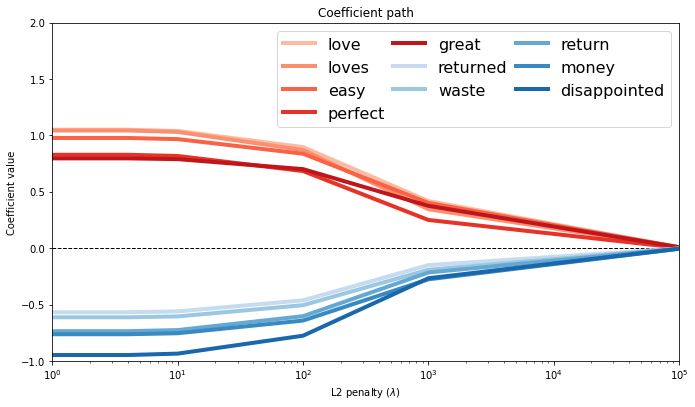

In [346]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    
    table_positive_words = table[positive_words] 
    table_negative_words = table[negative_words]
    #del table_positive_words['word']
    #del table_negative_words['word']
    
    for i, value in enumerate(positive_words):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[value].to_numpy().flatten(),
                 '-',label=positive_words[i], linewidth=4.0, color=color)
        
    for i, value in enumerate(negative_words):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[value].to_numpy().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()


make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])

In [353]:
# table[positive_words].plot(label=positive_words, linewidth = 4)
# plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
# plt.axis([1, 1e5, -1, 2])
# plt.title('Coefficient path')
# plt.xlabel('L2 penalty ($\lambda$)')
# plt.ylabel('Coefficient value')
# plt.xscale('log')
# plt.rcParams.update({'font.size': 18})
# plt.tight_layout()

#### Quiz Question: 
    (True/False) All coefficients consistently get smaller in size as L2 penalty is increased.
#### Ans 

#### Quiz Question: 
    (True/False) Relative order of coefficients is preserved as L2 penalty is increased. (If word 'cat' was more positive 
    than word 'dog', then it remains to be so as L2 penalty is increased.)

### Measuring accuracy

In [406]:
feature_matrix_train, sentiment_train

(array([[1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0]], dtype=int64),
 array([1, 1, 1, ..., 0, 0, 0]))

In [407]:
prediction_0_penalty_train = predict_probability(feature_matrix_train, coefficients_0_penalty)

In [408]:
(prediction_0_penalty_train>=0.5)*1

array([1, 0, 1, ..., 0, 0, 1])

In [409]:
((sentiment_train>=1)*1 == (prediction_0_penalty_train>=0.5)*1).sum()

33260

In [440]:
def Accuracy(features_matrix, coefficient_list, sentiment_matrix):
#     penalty = [0, 4, 10, 1e2, 1e3, 1e5]
    accuracy = []
    for i, coefficient in enumerate(coefficient_list):
        prediction = predict_probability(features_matrix, coefficient)
        # +1 for prediction>0.5 and 0  for prediction<=0.5
        prediction = list((prediction>0.5)*1)
        correctly_predicted = ((np.transpose(prediction) == sentiment_matrix)*1).sum()
        accuracy.append(correctly_predicted/len(sentiment_matrix))
    return accuracy

In [398]:
sentiment_train = sentiment_train>0

sentiment_train = sentiment_train*1
sentiment_train

In [400]:
cofficient_list = [coefficients_0_penalty, coefficients_4_penalty,
                   coefficients_10_penalty, coefficients_1e2_penalty,
                   coefficients_1e3_penalty, coefficients_1e5_penalty]

In [441]:
train_accuracy = Accuracy(feature_matrix_train, cofficient_list, sentiment_train)

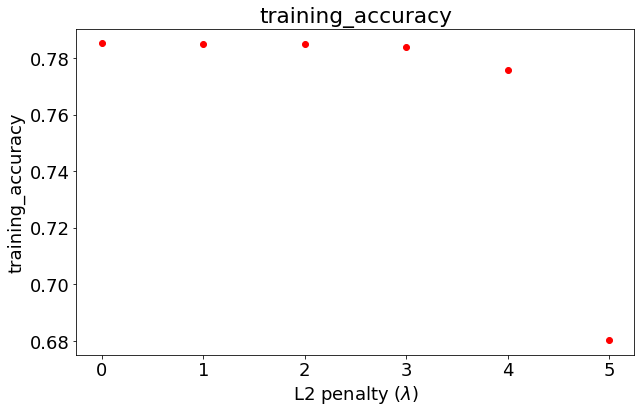

In [459]:
# l2_penalty_list=[] 
fig, ax = plt.subplots()
ax.plot( train_accuracy,'ro')
plt.title('training_accuracy')
plt.xlabel('L2 penalty ($\lambda$)')
plt.ylabel('training_accuracy')
plt.show()

In [468]:
[0, 4, 10, 1e2, 1e3, 1e5][train_accuracy.index(max(train_accuracy))]

0

In [469]:
max(train_accuracy)

0.7851561577866434

In [463]:
sentiment_valid = (sentiment_valid>0)*1
sentiment_valid

array([1, 1, 1, ..., 0, 0, 0])

In [464]:
valid_accuracy = Accuracy(feature_matrix_valid, cofficient_list, sentiment_valid)

In [465]:
valid_accuracy

[0.781439641490057,
 0.7815330034543927,
 0.7817197273830642,
 0.781066193632714,
 0.7713565493417982,
 0.667818130893474]

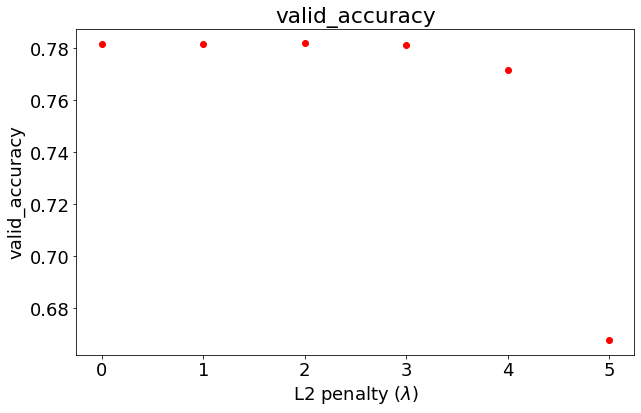

In [466]:
fig, ax = plt.subplots()
ax.plot( valid_accuracy,'ro')
plt.title('valid_accuracy')
plt.xlabel('L2 penalty ($\lambda$)')
plt.ylabel('valid_accuracy')
plt.show()

In [470]:
[0, 4, 10, 1e2, 1e3, 1e5][valid_accuracy.index(max(valid_accuracy))]

10

In [471]:
max(valid_accuracy)

0.7817197273830642

Quiz question: Which model (L2 = 0, 4, 10, 100, 1e3, 1e5) has the highest accuracy on the training data?

Quiz question: Which model (L2 = 0, 4, 10, 100, 1e3, 1e5) has the highest accuracy on the validation data?

Quiz question: Does the highest accuracy on the training data imply that the model is the best one?